In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *


df = pd.read_csv('Distribution_Data.csv')
df['class'] = pd.Categorical(df['class'], categories=[
                             "n", "s", "k", "mm"], ordered=True)
df

,class,value
0,n,3.918358
1,n,2.556974
2,n,5.834538
3,n,2.255196
4,n,4.443104
...,...,...
395,mm,3.352823
396,mm,3.571257
397,mm,3.932318
398,mm,4.335818


## (a)抖动散点图

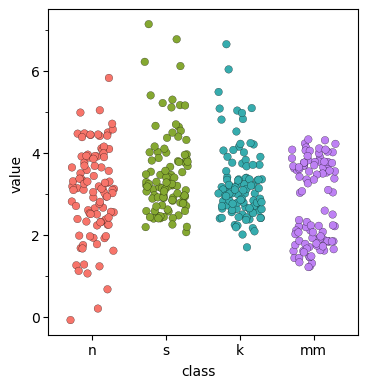

<ggplot: (111931564945)>


In [2]:
jitter_plot = (ggplot(df, aes(x='class', y="value", fill="class"))
               + geom_jitter(width=0.3, size=3, stroke=0.1, show_legend=False)
               + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
               + theme_matplotlib()
               + theme(  # legend_position='none',
    aspect_ratio=1.05,
    dpi=100,
    figure_size=(4, 4)))
print(jitter_plot)
# jitter_plot.save("jitter_plot.pdf")


## (b)蜂群图

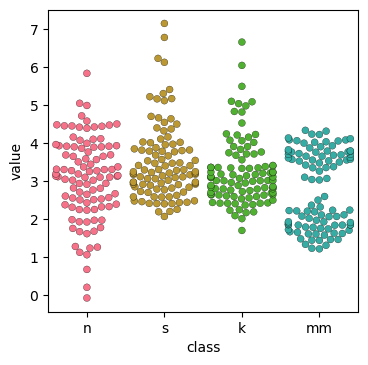

In [3]:
sns.set_palette("husl")  # 设定绘图的颜色主题
fig = plt.figure(figsize=(4, 4), dpi=100)
sns.swarmplot(x="class", y="value", hue="class",
              data=df, edgecolor='k', linewidth=0.2)
plt.legend().set_visible(False)


## (c)点阵图

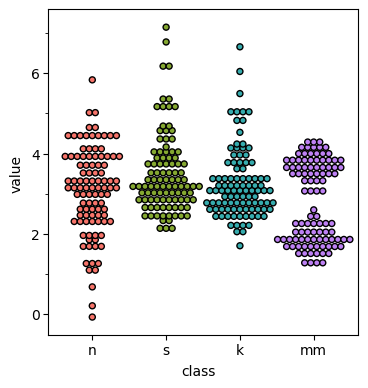

<ggplot: (111932113812)>


In [4]:
dot_plot = (ggplot(df, aes(x='class', y="value", fill="class"))
            + geom_dotplot(binaxis="y", stackdir='center',
                           binwidth=0.15, show_legend=False)
            + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
            + theme_matplotlib()
            + theme(  # legend_position='none',
    aspect_ratio=1.05,
    dpi=100,
    figure_size=(4, 4)))
print(dot_plot)
# dot_plot.save("dot_plot.pdf")


## (d) 带误差线的均值散点图

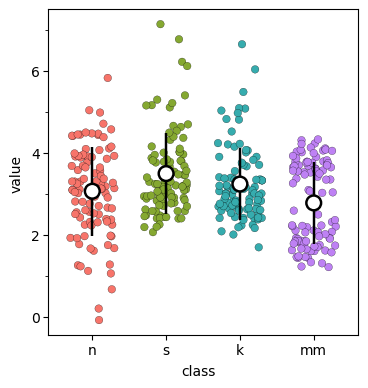

<ggplot: (111933221654)>


In [5]:
jitter_plot = (ggplot(df, aes(x='class', y="value", fill="class"))
               + geom_jitter(width=0.3, size=3, stroke=0.1, show_legend=False)
               + stat_summary(fun_data="mean_sdl", fun_args={
                              'mult': 1}, geom="pointrange", color="black", size=1, show_legend=False)
               #+stat_summary(fun_data="mean_sdl", fun_args = {'mult':1},geom="point", fill="w",color = "black",size = 5,stroke=1,show_legend=False)
               + geom_point(stat="summary", fun_data="mean_sdl", fun_args={
                            'mult': 1}, fill="w", color="black", size=5, stroke=1, show_legend=False)
               + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
               + theme_matplotlib()
               + theme(  # legend_position='none',
    aspect_ratio=1.05,
    dpi=100,
    figure_size=(4, 4)))
print(jitter_plot)
# jitter_plot.save("jitter_plot2.pdf")


## (e) 带误差线散点与点阵组合图

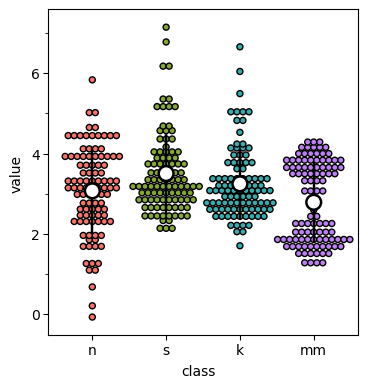

<ggplot: (111933256265)>


In [6]:
dot_plot = (ggplot(df, aes(x='class', y="value", fill="class"))
            + geom_dotplot(binaxis="y", stackdir='center',
                           binwidth=0.15, show_legend=False)
            + stat_summary(fun_data="mean_sdl", fun_args={
                           'mult': 1}, geom="pointrange", color="black", size=1, show_legend=False)
            + stat_summary(fun_data="mean_sdl", fun_args={
                           'mult': 1}, geom="point", fill="w", color="black", size=5, stroke=1, show_legend=False)
            + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
            + theme_matplotlib()
            + theme(  # legend_position='none',
    aspect_ratio=1.05,
    dpi=100,
    figure_size=(4, 4)))
print(dot_plot)
# dot_plot.save("dot_plot2.pdf")


## (f) 带连接线的带误差线散点图

In [7]:
df['time'] = pd.factorize(df['class'])[0]
df_group = df.groupby(df['time'], as_index=False).agg({'value': ['mean', 'std']})
df_group.columns = ['time', 'mean', 'std']
df_group


,time,mean,std
0,0,3.070895,1.085574
1,1,3.501773,0.997494
2,2,3.245976,0.877026
3,3,2.786117,0.994527


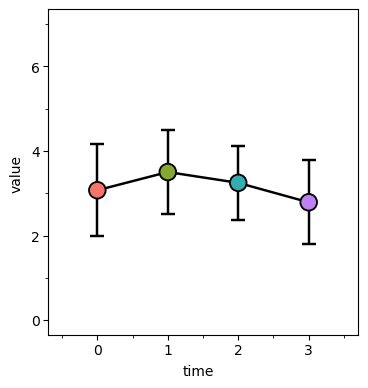

<ggplot: (111933208676)>


In [8]:
jitter_plot = (ggplot(df_group, aes(x='time', y='mean', ymin='mean-std', ymax='mean+std'))
               + geom_line(size=1, show_legend=False)
               + geom_errorbar(colour="black", width=0.2,
                               size=1, show_legend=False)
               + geom_point(aes(fill='factor(time)'), shape='o',
                            size=6, stroke=0.75, show_legend=False)
               + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
               + ylab("value")
               + xlim(-0.5, 3.5)
               + ylim(0, 7)
               + theme_matplotlib()
               + theme(  # legend_position='none',
    aspect_ratio=1.05,
    dpi=100,
    figure_size=(4, 4)))
print(jitter_plot)
# jitter_plot.save("jitter_plot3.pdf")
